In [306]:
## Install the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [308]:
df= pd.read_csv("Loan Prediction Dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [310]:
df.shape

(614, 13)

In [312]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [316]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

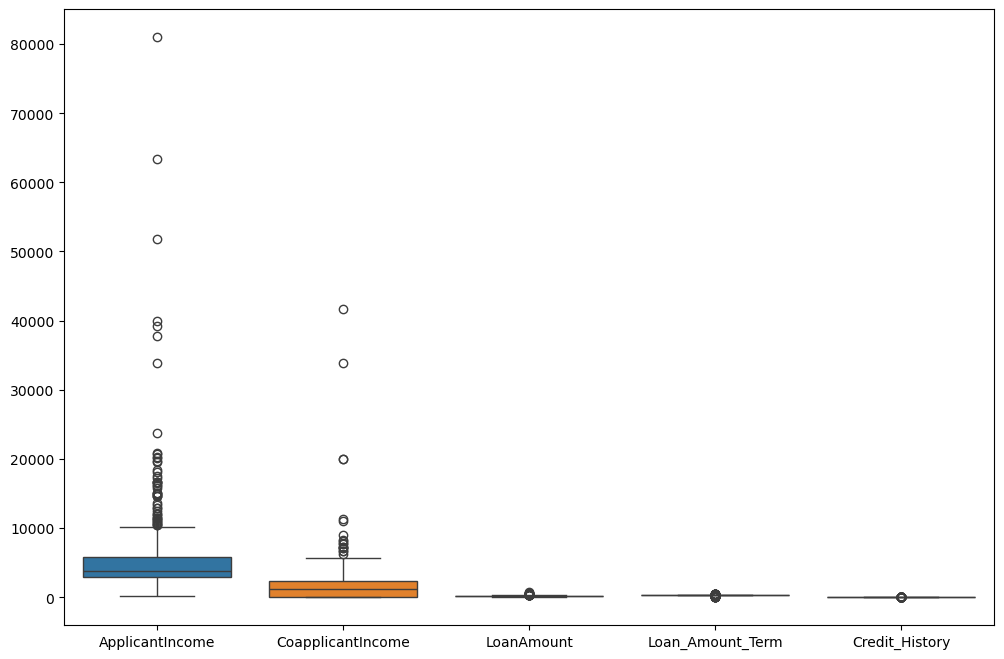

In [254]:
## Checking the outliers

num_cols = df.select_dtypes(i"nclude=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.boxplot(data=num_cols)
plt.xticks(rotation=0)
plt.show()

In [318]:
## Fill the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [320]:
## Fill the null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [322]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [324]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


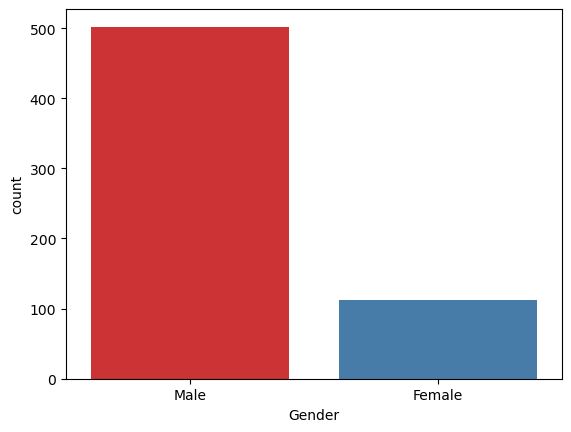

In [326]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')
plt.show()

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


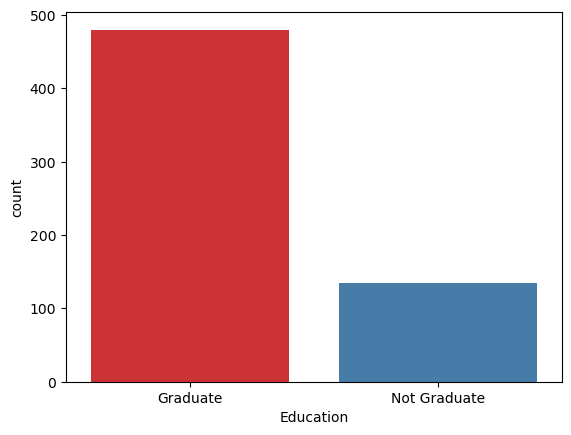

In [260]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set1')
plt.show()

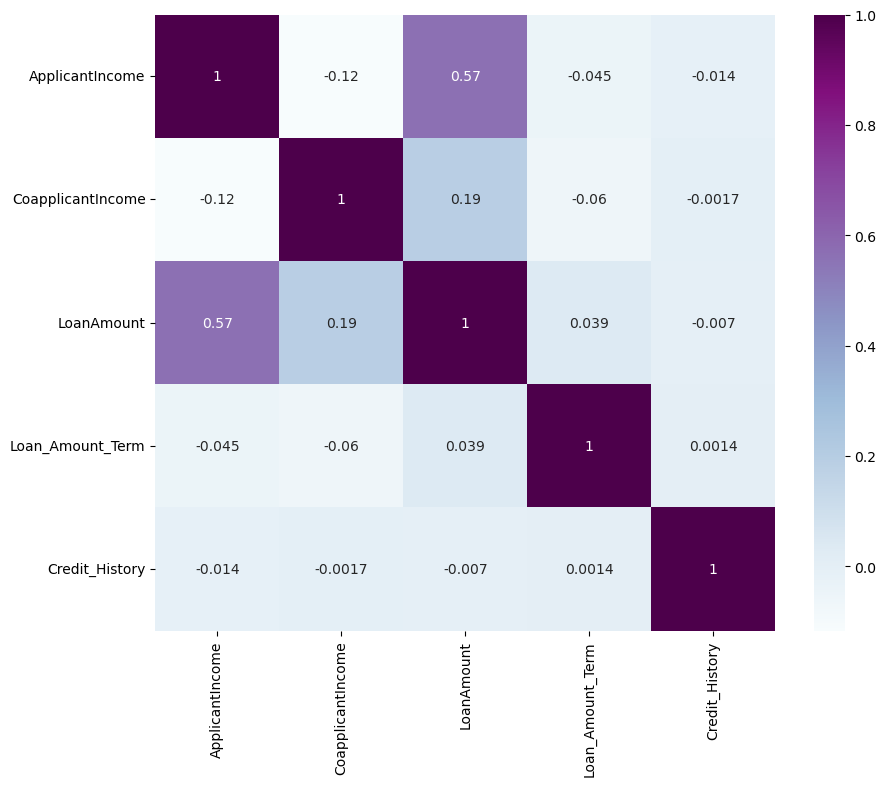

In [328]:
num_df = df.select_dtypes(include=['int64', 'float64'])

corr = num_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='BuPu')
plt.show()


In [330]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


In [332]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


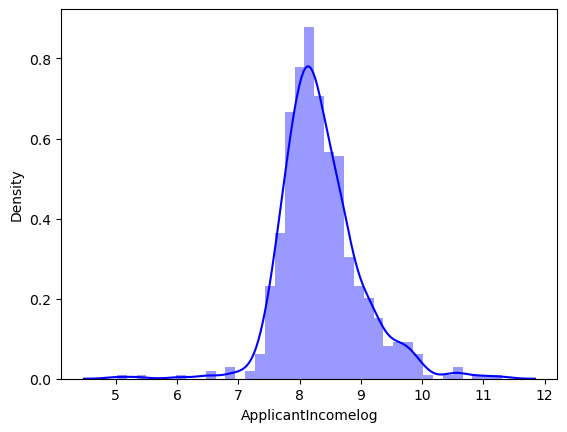

In [334]:
## Apply Log Transformation

df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomelog'], color='blue')
plt.show()

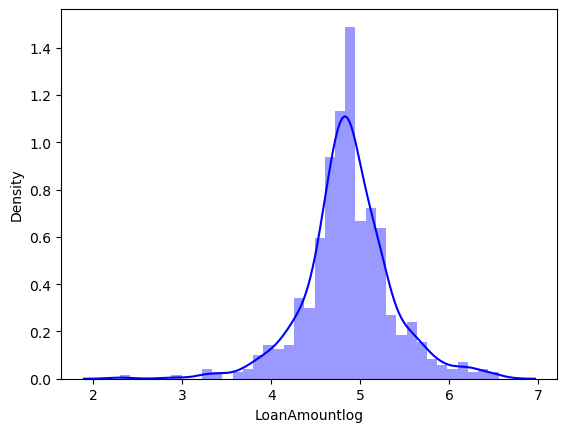

In [336]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'], color='blue')
plt.show()

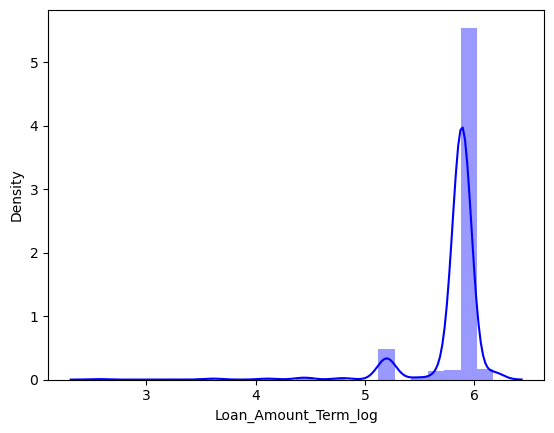

In [338]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'], color='blue')
plt.show()

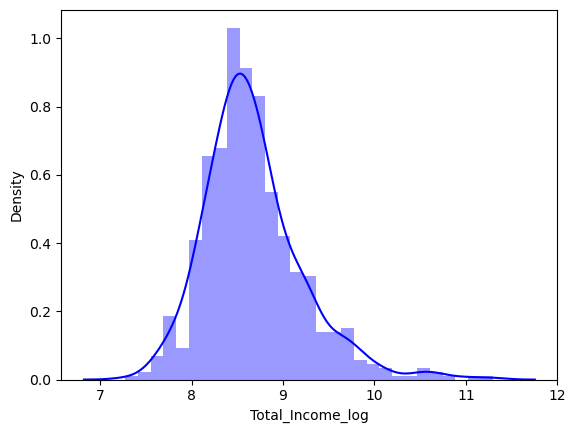

In [340]:
df['Total_Income_log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_log'], color='blue')
plt.show()

In [342]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [344]:
## drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [346]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [348]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,1,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,0,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,1,8.699681,4.955827,5.888878,8.699681


In [350]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [360]:
df['Loan_Status'].dtype

dtype('int64')

In [362]:
X = df.drop(columns=[
    'Loan_Status'
])
y = df['Loan_Status']

In [373]:
numeric_features = [
    'ApplicantIncomelog',
    'LoanAmountlog',
    'Total_Income_log',
    'Credit_History'
]

ordinal_features = ['Dependents']

nominal_features = [
    'Gender',
    'Married',
    'Education',
    'Self_Employed',
    'Property_Area'
]

In [397]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', OrdinalEncoder(), ordinal_features),
        ('nom', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_features)
    ]
)

In [399]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

In [395]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.6/72.0 MB 11.9 MB/s eta 0:00:06
   -- ------------------------------------- 4.5/72.0 MB 12.2 MB/s eta 0:00:06
   --- ------------------------------------ 6.3/72.0 MB 11.7 MB/s eta 0:00:06
   ----- ---------------------------------- 9.2/72.0 MB 11.9 MB/s eta 0:00:06
   ------ --------------------------------- 11.8/72.0 MB 11.9 MB/s eta 0:00:06
   ------- -------------------------------- 14.2/72.0 MB 11.9 MB/s eta 0:00:05
   --------- ------------------------------ 16.8/72.0 MB 11.9 MB/s eta 0:00:05
   ---------- ----------------------------- 19.1/72.0 MB 11.8 MB/s eta 0:00:05
   ----------- ---------------------------- 21.5/72.0 MB 11.8 MB/s eta 0:00:05
   ------------- -------------------------- 24.1/72.0 MB 11.8 MB/s eta 0:00:05
   -------------- ------------------------- 26.5/72.0 MB 11.8 MB/s eta 0:00:04
   ---------------- ----------------------- 28.8/72.0 MB 11.9 MB/

In [401]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    )
}

In [403]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversample', RandomOverSampler(random_state=42)),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_Score": f1_score(y_test, y_pred)
    }

results

{'LogisticRegression': {'Accuracy': 0.7142857142857143,
  'F1_Score': 0.7904761904761904},
 'DecisionTree': {'Accuracy': 0.6688311688311688,
  'F1_Score': 0.7487684729064039},
 'RandomForest': {'Accuracy': 0.7402597402597403,
  'F1_Score': 0.8165137614678899},
 'XGBoost': {'Accuracy': 0.7207792207792207, 'F1_Score': 0.7981220657276995}}

In [409]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

Loan_Status
1    322
0    322
Name: count, dtype: int64

In [418]:
from sklearn.model_selection import GridSearchCV
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2']
}

grid_lr = GridSearchCV(
    lr_pipeline,
    param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print("Best LR Params:", grid_lr.best_params_)
print("Best LR F1:", grid_lr.best_score_)

Best LR Params: {'model__C': 0.01, 'model__penalty': 'l2'}
Best LR F1: 0.8728651692650917


In [420]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'model__n_estimators': [200, 300, 500],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(
    rf_pipeline,
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF F1:", grid_rf.best_score_)

Best RF Params: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 500}
Best RF F1: 0.873542952791867


In [422]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ))
])

param_grid_xgb = {
    'model__n_estimators': [200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB F1:", grid_xgb.best_score_)


Best XGB Params: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best XGB F1: 0.850960774665779


In [424]:
print("Logistic Regression F1:", grid_lr.best_score_)
print("Random Forest F1:", grid_rf.best_score_)
print("XGBoost F1:", grid_xgb.best_score_)


Logistic Regression F1: 0.8728651692650917
Random Forest F1: 0.873542952791867
XGBoost F1: 0.850960774665779


In [426]:
best_model = grid_rf.best_estimator_

y_test_pred = best_model.predict(X_test)


              precision    recall  f1-score   support

           0       0.71      0.44      0.55        54
           1       0.75      0.90      0.82       100

    accuracy                           0.74       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.74      0.72       154



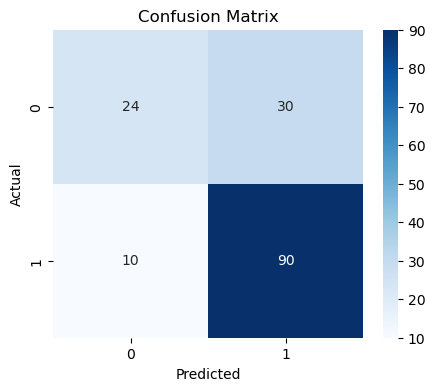

In [428]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [432]:
import joblib
joblib.dump(best_model, "loan_approval_model.pkl")
print("Model saved successfully")

Model saved successfully


In [434]:
import os
os.getcwd()


'C:\\Users\\HP\\Loan Prediction project'